In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

from dpks import QuantMatrix

sns.set_theme(font="Arial", style="white", context="poster")

In [8]:

def preprocess_design_matrix(design_matrix):

    design_matrix = design_matrix[
        ((design_matrix['Sepsis Prob'] >= 0.8) | 
        (design_matrix['Sepsis Prob'] <= 0.50))
    ].copy()

    design_matrix['group'] = np.where(
        design_matrix['Sepsis Prob'] > 0.65, 2, 1
    )

    design_matrix['sample'] = design_matrix['injection']

    return design_matrix

In [9]:
def preprocess_data(raw_data, design_matrix):

    quant_matrix = QuantMatrix(
        quantification_file=raw_data[['Protein'] + [sample for sample in design_matrix['sample'].values]].copy(),
        design_matrix_file=design_matrix,
        annotation_fasta_file="../0_data/2023-04-24-UP000005640.fas"
    )

    quant_data = quant_matrix.to_df()
    
    quant_data = quant_data[~((quant_data["ProteinLabel"].str.startswith("HV")) | (quant_data["ProteinLabel"].str.startswith("LV")) | quant_data["ProteinLabel"].str.startswith("KV"))]
    quant_data = quant_data[~quant_data["ProteinLabel"].str.startswith("IG")]
    quant_data = quant_data[~((quant_data["ProteinLabel"] == "HBA_HUMAN") | (quant_data["ProteinLabel"] == "HBB_HUMAN") | (quant_data["ProteinLabel"] == "HBD_HUMAN") | (quant_data["ProteinLabel"] == "HEMO_HUMAN"))]


    quant_matrix = QuantMatrix(
        quantification_file=quant_data,
        design_matrix_file=design_matrix,
        annotation_fasta_file="../0_data/2023-04-24-UP000005640.fas"
    )

    return quant_matrix.annotate()     


In [10]:
def preprocess_test_data(raw_data, design_matrix):

    quant_matrix = QuantMatrix(
        quantification_file=raw_data[['Protein'] + [sample for sample in design_matrix['sample'].values]].copy(),
        design_matrix_file=design_matrix,
        annotation_fasta_file="../0_data/2023-04-24-UP000005640.fas"
    )

    quant_data = quant_matrix.to_df()
    
    quant_data = quant_data[~((quant_data["ProteinLabel"].str.startswith("HV")) | (quant_data["ProteinLabel"].str.startswith("LV")) | quant_data["ProteinLabel"].str.startswith("KV"))]
    quant_data = quant_data[~quant_data["ProteinLabel"].str.startswith("IG")]
    quant_data = quant_data[~((quant_data["ProteinLabel"] == "HBA_HUMAN") | (quant_data["ProteinLabel"] == "HBB_HUMAN") | (quant_data["ProteinLabel"] == "HBD_HUMAN") | (quant_data["ProteinLabel"] == "HEMO_HUMAN"))]

    quant_matrix = QuantMatrix(
        quantification_file=quant_data,
        design_matrix_file=design_matrix,
        annotation_fasta_file="../0_data/2023-04-24-UP000005640.fas"
    )

    return quant_matrix.annotate()   

# Model Training

In [11]:
ms_data = pd.read_csv(
    "../0_data/proteins_test_filtered.tsv"
    , sep="\t"
)

In [12]:
design_matrix_otrain = pd.read_csv(
    "../1_clinical_digital_family/design_matrix_test_sepsis_risk.tsv",
    sep='\t'
)

In [13]:
design_matrix_otrain

,Unnamed: 0,injection,sao2_ambulance,resp_frequency_ambulance,heart_rate_ambulance,syst_bp_ambulance,map_ambulance,mental_status_ambulance,temperature_ambulance,crea_emergency_department,...,bootstrap_91,bootstrap_92,bootstrap_93,bootstrap_94,bootstrap_95,bootstrap_96,bootstrap_97,bootstrap_98,bootstrap_99,Sepsis Prob
0,0,SA_BOX_9-159_S1-D9_1_6172,85.0,28.0,86.0,146.0,95.333333,1.0,39.1,102.0,...,0.5,0.6,0.5,0.7,0.7,0.5,0.6,0.6,0.6,0.550
1,1,SA_BOX_7-267_S4-H8_1_5971,94.0,22.0,159.0,90.0,70.000000,1.0,37.7,145.0,...,0.7,0.6,0.6,0.6,0.6,0.6,0.7,0.6,0.6,0.639
2,2,SA_BOX_15-464_S4-G9_1_6763,82.0,36.0,125.0,160.0,NaN,1.0,38.7,72.0,...,0.9,0.9,0.8,0.8,0.9,0.8,0.8,0.8,0.8,0.821
3,3,SA_BOX_2-1700_S2-D11_1_6971,92.0,16.0,100.0,100.0,NaN,1.0,38.8,216.0,...,0.8,0.7,0.7,0.8,0.8,0.7,0.7,0.7,0.7,0.754
4,4,SA_BOX_7-1728_S4-F9_1_5977,82.0,30.0,107.0,120.0,NaN,1.0,38.8,166.0,...,0.3,0.2,0.3,0.4,0.4,0.3,0.3,0.4,0.4,0.353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,675,SA_BOX_6-659_S2-F10_1_5887,86.0,28.0,91.0,85.0,67.000000,1.0,38.8,145.0,...,0.9,0.9,0.8,0.9,0.9,0.9,1.0,0.9,0.9,0.916
676,676,SA_BOX_7-2061_S4-H5_1_5946,96.0,24.0,134.0,107.0,95.666667,1.0,38.8,58.0,...,0.5,0.3,0.3,0.4,0.5,0.5,0.5,0.6,0.5,0.514
677,677,SA_BOX_2-764_S2-G2_1_6901,90.0,32.0,60.0,100.0,73.333333,1.0,38.6,141.0,...,0.9,0.9,0.9,0.9,0.9,0.8,1.0,0.9,0.9,0.899
678,678,SA_BOX_6-774_S2-D10_1_5885,99.0,28.0,120.0,100.0,NaN,1.0,38.0,94.0,...,0.7,0.7,0.7,0.7,0.8,0.7,0.7,0.7,0.7,0.730


<Axes: xlabel='Sepsis Prob', ylabel='Count'>

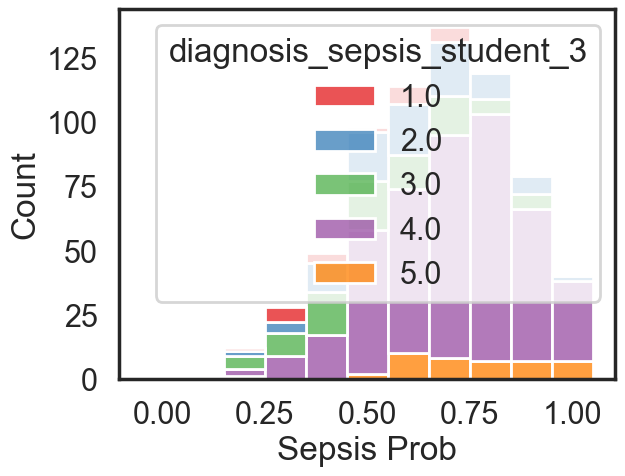

In [14]:
sns.histplot(
    design_matrix_otrain,
    x="Sepsis Prob",
    hue="diagnosis_sepsis_student_3",
    palette="Set1",
    binwidth=0.1,
    binrange=(-0.05, 1.05),
    multiple="stack",
    bins=10,
    # kde=True
)

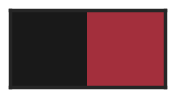

In [15]:
custom_palette = ["k", "#A32F3C"]  # Define hex colors
palette = sns.color_palette(custom_palette, as_cmap=True)
sns.palplot(custom_palette)

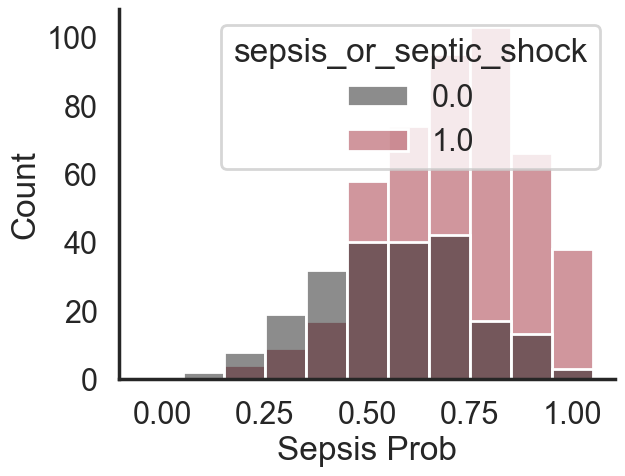

In [16]:
g = sns.histplot(
    design_matrix_otrain,
    x="Sepsis Prob",
    hue="sepsis_or_septic_shock",
    palette=palette,
    binwidth=0.1,
    binrange=(-0.05, 1.05),
    #multiple="stack",
    bins=10,
    # kde=True
)

sns.despine()

g.figure.savefig("sepsis_diagnosis_probability.pdf", dpi=300, bbox_inches="tight")

/tmp/ipykernel_940500/683471671.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='sepsis_or_septic_shock', ylabel='Sepsis Prob'>

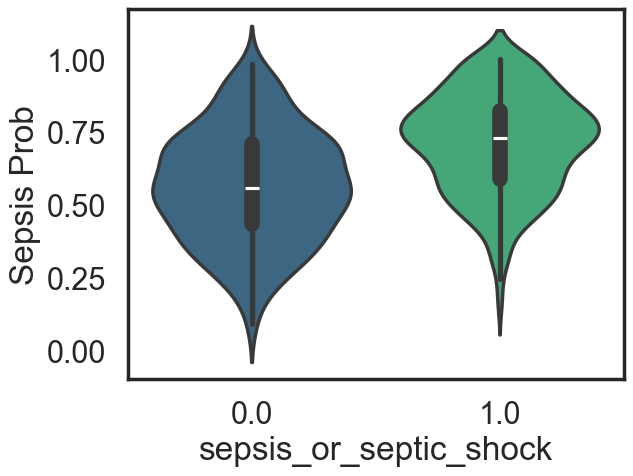

In [17]:
sns.violinplot(
    design_matrix_otrain,
    y="Sepsis Prob",
    x="sepsis_or_septic_shock",
    palette="viridis",
    #multiple="stack",
    # bins=20,
    # kde=True
)

/tmp/ipykernel_940500/3956527602.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='diagnosis_sepsis_student_3', ylabel='Sepsis Prob'>

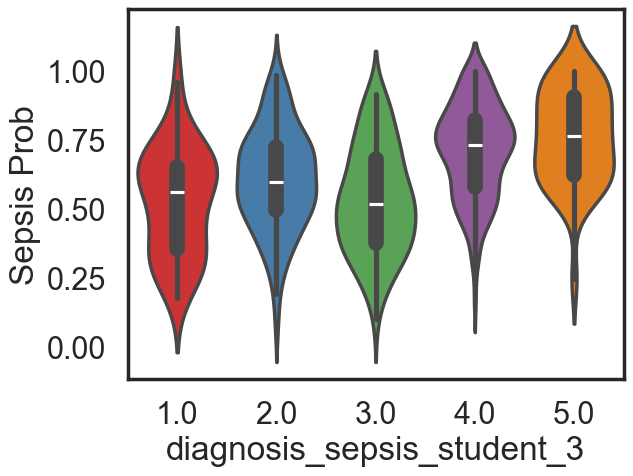

In [18]:
sns.violinplot(
    design_matrix_otrain,
    y="Sepsis Prob",
    x="diagnosis_sepsis_student_3",
    palette="Set1",
    #multiple="stack",
    # bins=20,
    # kde=True
)

In [19]:
design_matrix_train = preprocess_design_matrix(design_matrix_otrain.copy())

<Axes: xlabel='Sepsis Prob', ylabel='Count'>

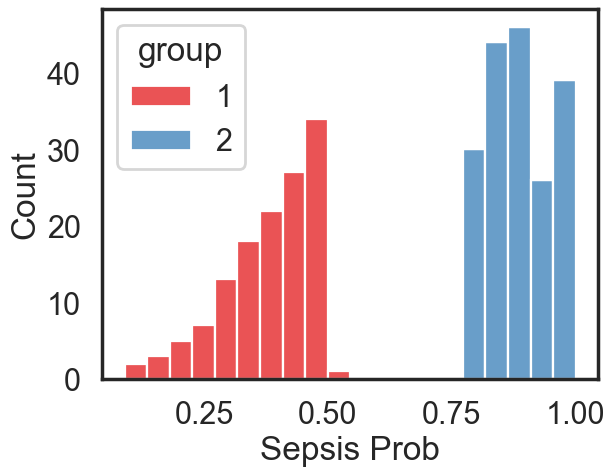

In [20]:
sns.histplot(
    design_matrix_train,
    x="Sepsis Prob",
    hue="group",
    palette="Set1",
    multiple="stack",
    bins=20
)

<Axes: xlabel='diagnosis_sepsis_student_3', ylabel='Count'>

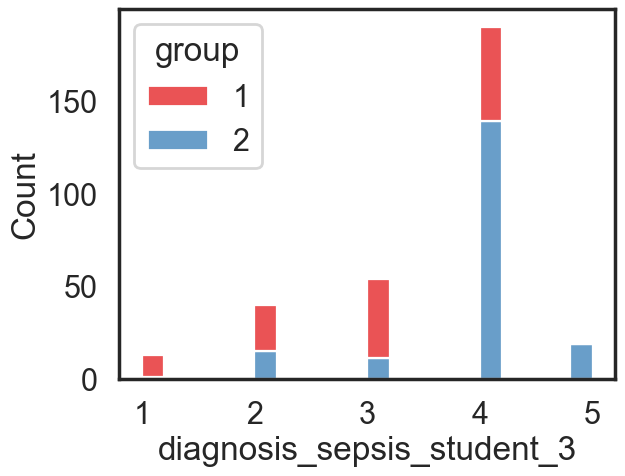

In [21]:
sns.histplot(
    design_matrix_train,
    x="diagnosis_sepsis_student_3",
    hue="group",
    palette="Set1",
    multiple="stack",
    bins=20
)

In [22]:
design_matrix_train['group'].value_counts()

group
2    185
1    132
Name: count, dtype: int64

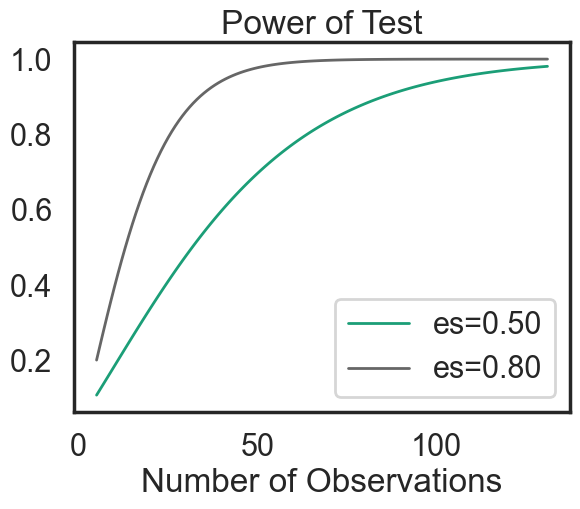

In [23]:
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# parameters for power analysis
effect_sizes = np.array([0.5, 0.8])
sample_sizes = np.array(range(5, design_matrix_train['group'].value_counts()[1]))


analysis = TTestIndPower()

analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

In [24]:
quant_matrix_train = preprocess_data(ms_data, design_matrix=design_matrix_train)

In [25]:
quant_matrix_train = quant_matrix_train.compare(
    method="linregress",
    comparisons=(2,1),
    min_samples_per_group=2,
    level="protein",
    multiple_testing_correction_method="fdr_tsbh"
)

In [26]:
quant_matrix_train.write("highrisk_sepsis_de_proteins.tsv")

In [27]:
quant_matrix_de = quant_matrix_train.to_df()

In [28]:
quant_matrix_de['Color'] = np.where(
    quant_matrix_de['CorrectedPValue2-1'] <= 0.01, 1, 0
)

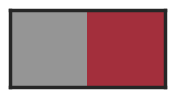

In [29]:
custom_palette = ["#959595", "#A32F3C"]  # Define hex colors
palette = sns.color_palette(custom_palette, as_cmap=True)
sns.palplot(custom_palette)

In [30]:
quant_matrix_de[quant_matrix_de['CorrectedPValue2-1'] <= 0.01]

,Protein,ProteinLabel,Gene,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,...,SA_BOX_3-2583_S4-A11_1_5596,SA_BOX_15-663_S4-C1_1_6694,SA_BOX_1-259_S1-G5_1_6827,SA_BOX_14-1566_S2-H4_1_6625,SA_BOX_8-1160_S5-E3_1_6025,SA_BOX_12-1949_S5-C4_1_6424,SA_BOX_10-1165_S2-B6_1_6243,SA_BOX_6-659_S2-F10_1_5887,SA_BOX_2-764_S2-G2_1_6901,Color
0,P02671,FIBA_HUMAN,FGA,0.740222,19.454514,19.197454,0.233879,0.302691,0.257060,7.908275e-16,...,19.404870,19.219480,19.434650,19.600700,19.945478,19.228436,19.440404,19.413945,19.446866,1
1,P02787,TRFE_HUMAN,TF,0.309263,19.509117,19.663906,0.261545,0.274537,-0.154789,6.746908e-07,...,20.246120,19.093970,19.402185,19.341731,18.815082,19.635437,19.738758,19.648279,19.465896,1
4,P06396,GELS_HUMAN,GSN,0.256522,14.905553,15.126166,0.445851,0.450659,-0.220613,2.187124e-05,...,16.000440,14.084810,14.368574,14.117389,14.110880,14.517564,15.487246,15.026240,15.276030,1
5,P04275,VWF_HUMAN,VWF,0.895557,14.530395,13.872057,0.614296,0.660131,0.658338,1.149880e-17,...,15.085713,13.416666,13.917390,13.758238,14.561246,14.095655,14.107157,14.223937,14.307892,1
6,P10643,CO7_HUMAN,C7,0.152552,14.844623,14.671926,0.497119,0.542211,0.172697,3.681941e-03,...,16.879624,14.394560,14.489029,13.949304,15.078616,15.751011,14.866351,15.353393,14.677778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,P55056,APOC4_HUMAN,APOC4,0.268836,11.563490,11.930283,0.916488,0.812400,-0.366793,2.857713e-04,...,11.367069,10.645653,10.437166,10.955241,10.907036,11.806153,12.063437,12.136490,10.265417,1
273,Q16270,IBP7_HUMAN,IGFBP7,0.275293,9.688854,9.299618,0.821147,1.100402,0.389236,3.774072e-04,...,9.966192,9.304019,9.649099,9.074857,10.034904,10.581494,9.402809,10.361490,9.791055,1
276,Q9Y279,VSIG4_HUMAN,VSIG4,1.137634,7.141038,5.377698,2.274733,1.961375,1.763340,5.161009e-12,...,8.424509,3.742087,7.316799,4.234413,9.874901,8.012105,3.557221,7.560878,6.753525,1
285,Q7L2H7,EIF3M_HUMAN,EIF3M,0.222494,15.071886,15.323882,0.641046,0.538405,-0.251997,2.827218e-04,...,16.075193,13.366689,15.305685,14.133238,14.485120,14.229865,15.736272,15.519163,15.556819,1


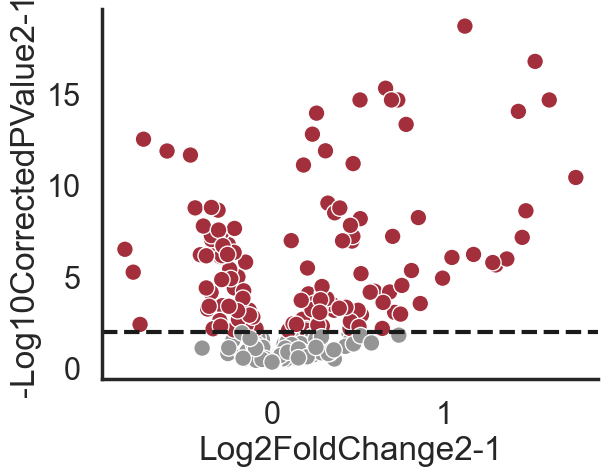

In [31]:
ax = sns.scatterplot(
    data=quant_matrix_de,
    x="Log2FoldChange2-1",
    y="-Log10CorrectedPValue2-1",
    hue="Color",
    #s=30,
    #alpha=0.8,
    legend=False,
    palette=palette
)

ax.axhline(
    -np.log10(0.01), c="k", linestyle="--"
)
sns.despine()
#ax.figure.set_size_inches((3, 3))

In [32]:
ax.figure.savefig(
    "sepsis_volcano.pdf", dpi=300, bbox_inches="tight"
)

In [ ]:
enr = quant_matrix_train.enrich(
    method="enrichr_overreptest",
    libraries=['GO_Biological_Process_2023'],
    filter_pvalue=True,
    pvalue_column="CorrectedPValue2-1",
    pvalue_cutoff=0.01
)

In [34]:
base_color = "#A32F3C"

In [35]:
cmap = sns.color_palette(f"light:{base_color}", as_cmap=True)

In [ ]:
# simple plotting function

sns.set_theme(context="notebook", style="white")
from gseapy import barplot, dotplot

ax = dotplot(
    enr.res2d, 
    title='GO Biological Processes',
    cmap=cmap, 
    size=4, 
    figsize=(4,3),
    cutoff=1,
    top_term=10
    
)

sns.despine()

In [37]:
ax.figure.savefig(
    "sepsis_pathways.pdf", dpi=300, bbox_inches="tight"
)

<Axes: >

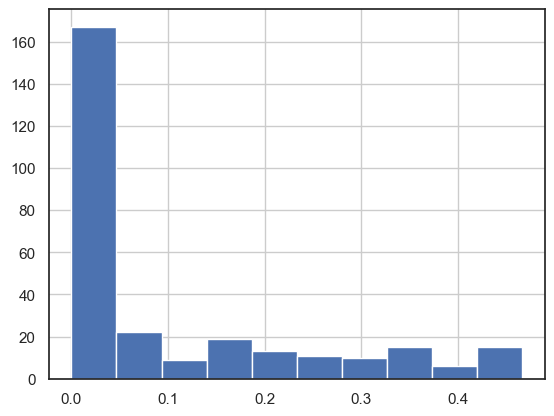

In [38]:
quant_matrix_de['CorrectedPValue2-1'].hist()

In [39]:
qm_filtered = (
    
    QuantMatrix(
        quantification_file=quant_matrix_de,
        design_matrix_file=design_matrix_train
    )
    
)

In [40]:
training_data, y = qm_filtered.to_ml(feature_column="ProteinLabel")

In [41]:
protein_columns = training_data.columns.to_list()

In [42]:
len(protein_columns)

287

In [43]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

X = training_data.copy()

protein_scaler = StandardScaler()

X[protein_columns] = protein_scaler.fit_transform(X[protein_columns])

X = X.copy()

In [44]:
from sklearn.utils.class_weight import compute_class_weight


class_weight = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y.values.ravel()),
    y=y.values.ravel()
)

class_weight = dict(zip(np.unique(y.values.ravel()), class_weight))

class_weight

{0: 1.2007575757575757, 1: 0.8567567567567568}

In [45]:
from mrmr import mrmr_classif
selected_proteins = mrmr_classif(X=X[protein_columns], y=y.values.ravel(), K=50)

100%|██████████| 50/50 [00:12<00:00,  4.11it/s]


In [46]:
selected_proteins

['TIMP1_HUMAN',
 'KNG1_HUMAN',
 'FIBG_HUMAN',
 'CRP_HUMAN',
 'VWF_HUMAN',
 'ALS_HUMAN',
 'SAA2_HUMAN',
 'CYTC_HUMAN',
 'LBP_HUMAN',
 'IBP3_HUMAN',
 'B2MG_HUMAN',
 'SAA1_HUMAN',
 'H4_HUMAN',
 'FIBA_HUMAN',
 'AACT_HUMAN',
 'THBG_HUMAN',
 'FIBB_HUMAN',
 'FETUA_HUMAN',
 'VSIG4_HUMAN',
 'FETUB_HUMAN',
 'A1AG1_HUMAN',
 'CFAD_HUMAN',
 'A2GL_HUMAN',
 'CSPG2_HUMAN',
 'CLUS_HUMAN',
 'HS90A_HUMAN',
 'IBP2_HUMAN',
 'FBLN5_HUMAN',
 'PCYOX_HUMAN',
 'PSPB_HUMAN',
 'F13B_HUMAN',
 'RS27A_HUMAN',
 'IPSP_HUMAN',
 'RNAS4_HUMAN',
 'ITIH3_HUMAN',
 'CD14_HUMAN',
 'COIA1_HUMAN',
 'BTD_HUMAN',
 'VCAM1_HUMAN',
 'PGRP2_HUMAN',
 'PROC_HUMAN',
 'CATB_HUMAN',
 'HRG_HUMAN',
 'LYSC_HUMAN',
 'A1AT_HUMAN',
 'CAP1_HUMAN',
 'APOL1_HUMAN',
 'FGL1_HUMAN',
 'CATD_HUMAN',
 'KLKB1_HUMAN']

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier


# protein_clf = LogisticRegression(
#     random_state=42,
#     penalty="l1",
#     class_weight=class_weight,
#     C=1,
#     solver="liblinear",
#     max_iter=1000
# )

protein_clf = LogisticRegression(
    class_weight=class_weight,
    random_state=42
)

In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate

cv = StratifiedKFold(3)
eval_result = cross_validate(
    protein_clf, X[selected_proteins], y.values.ravel(), scoring=("recall", "precision", "accuracy", "balanced_accuracy"), cv=cv,
)
eval_result['test_recall'].mean(), eval_result['test_precision'].mean(), eval_result['test_accuracy'].mean(), eval_result['test_balanced_accuracy'].mean()

(0.746430460074035, 0.8290212264150943, 0.7603174603174603, 0.7633667451885326)

In [49]:
from dpks.interpretation import BootstrapInterpreter

protein_interpreter = BootstrapInterpreter(
    n_iterations=100,
    feature_names=selected_proteins,
    downsample_background=True,
    shuffle_iterations=100
)

In [50]:
protein_interpreter.fit(X[selected_proteins].values, y.values.ravel(), protein_clf)

In [51]:
protein_importances = protein_interpreter.results_.sort_values("mean_importance", ascending=False)

In [52]:
protein_importances.head(20)

,feature,iteration_0_importance,iteration_0_rank,iteration_1_importance,iteration_1_rank,iteration_2_importance,iteration_2_rank,iteration_3_importance,iteration_3_rank,iteration_4_importance,...,iteration_98_importance,iteration_98_rank,iteration_99_importance,iteration_99_rank,mean_importance,median_importance,stdev_importance,mean_rank,median_rank,stdev_rank
4,VWF_HUMAN,0.858999,3.0,0.668427,3.0,0.643645,6.0,1.000000,1.0,1.000000,...,0.875926,2.0,0.431048,10.0,0.663915,0.699201,0.268911,8.64,4.0,10.268634
3,CRP_HUMAN,0.994338,2.0,0.633900,4.0,0.416963,20.0,0.797450,3.0,0.276307,...,1.000000,1.0,0.570407,3.0,0.570283,0.568344,0.309553,12.75,6.0,13.273635
8,LBP_HUMAN,0.752411,5.0,0.395859,15.0,0.595747,9.0,0.380594,16.0,0.250954,...,0.004750,50.0,0.449044,9.0,0.517214,0.500186,0.276874,13.93,10.0,12.646120
10,B2MG_HUMAN,0.670660,7.0,0.037133,41.0,0.393973,22.0,0.853810,2.0,0.156357,...,0.591012,5.0,1.000000,1.0,0.488389,0.491229,0.275452,15.52,11.0,13.133718
38,VCAM1_HUMAN,0.634371,10.0,0.042129,39.0,0.255970,33.0,0.055986,43.0,0.012423,...,0.716847,4.0,0.927889,2.0,0.473330,0.469715,0.301481,16.88,10.0,15.435941
2,FIBG_HUMAN,0.308668,27.0,1.000000,1.0,0.614640,8.0,0.236519,26.0,0.476465,...,0.497231,10.0,0.486207,6.0,0.412842,0.398617,0.244714,18.22,14.0,13.311786
14,AACT_HUMAN,0.226617,35.0,0.197146,31.0,0.234332,34.0,0.559852,7.0,0.125021,...,0.311426,22.0,0.330482,17.0,0.358332,0.307570,0.253744,21.97,22.0,14.186674
9,IBP3_HUMAN,0.742053,6.0,0.542301,8.0,1.000000,1.0,0.470249,11.0,0.098903,...,0.198617,27.0,0.459542,7.0,0.352056,0.326673,0.254914,22.79,19.0,15.055651
15,THBG_HUMAN,0.555858,16.0,0.462338,10.0,0.478808,16.0,0.173370,32.0,0.118686,...,0.019439,46.0,0.300807,23.0,0.352001,0.320385,0.234063,21.27,18.5,13.442624
47,FGL1_HUMAN,0.002543,50.0,0.019786,43.0,0.647286,5.0,0.709352,5.0,0.027287,...,0.428965,16.0,0.042335,43.0,0.348276,0.317605,0.270706,23.13,18.5,16.019341


In [53]:
selected_proteins = protein_importances.head(10)['feature'].to_list()

In [54]:
from dpks.interpretation import Classifier


protein_clf = Classifier(protein_clf)

In [55]:
selected_features = selected_proteins[:10]

In [56]:
for feature in selected_features:

    print(feature)

VWF_HUMAN
CRP_HUMAN
LBP_HUMAN
B2MG_HUMAN
VCAM1_HUMAN
FIBG_HUMAN
AACT_HUMAN
IBP3_HUMAN
THBG_HUMAN
FGL1_HUMAN


In [57]:
protein_clf = LogisticRegression(
    class_weight=class_weight,
    random_state=42
)

In [58]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate

cv = StratifiedKFold(3)
eval_result = cross_validate(
    protein_clf, X[selected_features], y.values.ravel(), scoring=("recall", "precision", "accuracy", "balanced_accuracy"), cv=cv,
)
eval_result['test_recall'].mean(), eval_result['test_precision'].mean(), eval_result['test_accuracy'].mean(), eval_result['test_balanced_accuracy'].mean()

(0.8111228626828838, 0.8603345975042819, 0.807517220724768, 0.8070765828565934)

In [59]:
cv = StratifiedKFold(3)
eval_result = cross_validate(
    protein_clf, X[protein_columns], y.values.ravel(), scoring=("recall", "precision", "accuracy", "balanced_accuracy"), cv=cv,
)
eval_result['test_recall'].mean(), eval_result['test_precision'].mean(), eval_result['test_accuracy'].mean(), eval_result['test_balanced_accuracy'].mean()

(0.7627357659086903,
 0.7903003626391931,
 0.7414195867026055,
 0.7374284890149512)

In [60]:
from dpks.interpretation import BootstrapInterpreter

final_protein_interpreter = BootstrapInterpreter(
    n_iterations=100,
    feature_names=selected_features,
    downsample_background=True,
    shuffle_iterations=100
)

In [61]:
final_protein_interpreter.fit(X[selected_features].values, y.values.ravel(), protein_clf)

In [62]:
final_protein_importances = final_protein_interpreter.results_.sort_values("mean_importance", ascending=False)

In [63]:
final_protein_importances

,feature,iteration_0_importance,iteration_0_rank,iteration_1_importance,iteration_1_rank,iteration_2_importance,iteration_2_rank,iteration_3_importance,iteration_3_rank,iteration_4_importance,...,iteration_98_importance,iteration_98_rank,iteration_99_importance,iteration_99_rank,mean_importance,median_importance,stdev_importance,mean_rank,median_rank,stdev_rank
0,VWF_HUMAN,0.925871,2.0,0.870788,2.0,0.814014,4.0,0.513372,2.0,1.000000,...,1.000000,1.0,0.846546,2.0,0.839585,0.923922,0.196444,2.45,2.0,1.689988
7,IBP3_HUMAN,0.882197,3.0,1.000000,1.0,0.861579,2.0,0.279352,4.0,0.537967,...,0.689723,3.0,1.000000,1.0,0.700368,0.704444,0.204423,3.27,3.0,1.895529
1,CRP_HUMAN,1.000000,1.0,0.600795,4.0,1.000000,1.0,1.000000,1.0,0.245453,...,0.887831,2.0,0.186486,7.0,0.696228,0.754232,0.290351,3.62,3.0,2.585039
3,B2MG_HUMAN,0.511668,5.0,0.422237,7.0,0.245963,7.0,0.274474,5.0,0.045738,...,0.309673,8.0,0.814934,3.0,0.581764,0.538967,0.234395,4.26,4.0,1.987943
2,LBP_HUMAN,0.464009,7.0,0.758351,3.0,0.825410,3.0,0.144238,8.0,0.338777,...,0.273159,9.0,0.612840,5.0,0.502484,0.490554,0.267475,5.39,5.0,2.554042
8,THBG_HUMAN,0.467635,6.0,0.523390,5.0,0.446692,6.0,0.199982,7.0,0.260083,...,0.319890,7.0,0.335699,6.0,0.436309,0.417157,0.207120,5.90,6.0,2.222475
5,FIBG_HUMAN,0.211433,9.0,0.484245,6.0,0.099920,10.0,0.034265,10.0,0.469457,...,0.573783,4.0,0.127021,9.0,0.348365,0.288200,0.235569,7.00,8.0,2.305023
4,VCAM1_HUMAN,0.542522,4.0,0.081459,10.0,0.212547,8.0,0.083876,9.0,0.079376,...,0.334129,6.0,0.716672,4.0,0.312141,0.304626,0.201874,7.21,7.0,2.090358
6,AACT_HUMAN,0.376994,8.0,0.416275,8.0,0.543946,5.0,0.256547,6.0,0.229534,...,0.197857,10.0,0.145202,8.0,0.277645,0.266720,0.181377,7.76,8.0,2.065200
9,FGL1_HUMAN,0.205231,10.0,0.194254,9.0,0.111926,9.0,0.329846,3.0,0.109591,...,0.356857,5.0,0.040759,10.0,0.242368,0.212877,0.176049,8.14,9.0,1.922856


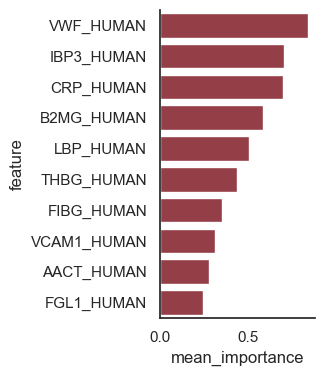

In [64]:
sns.set_theme(context="notebook", style="white")

g = sns.barplot(
    data=final_protein_importances,
    y="feature",
    x="mean_importance",
    color="#A32F3C"
)

g.figure.set_size_inches((2, 4))

sns.despine()

In [65]:
g.figure.savefig(
    "sepsis_feature_importances.pdf", dpi=300, bbox_inches="tight"
)

In [66]:
from umap import UMAP

reducer = UMAP(
    n_components=2,
    random_state=42,
    #n_neighbors=5
)

In [67]:
components = reducer.fit_transform(X[selected_features])

In [68]:
design_matrix_train['UMAP 1'] = components[:, 0]
design_matrix_train['UMAP 2'] = components[:, 1]

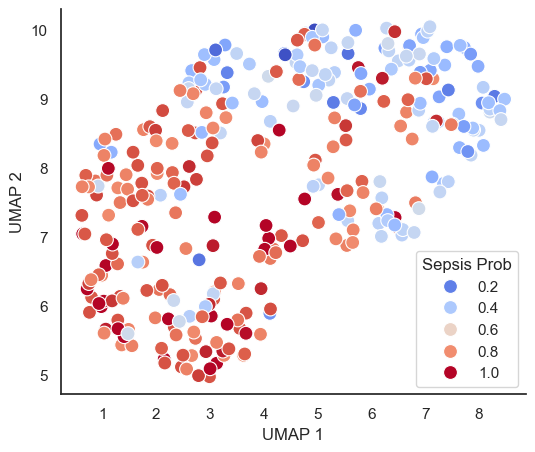

In [69]:
cm_to_inch = 1 / 2.54

g = sns.scatterplot(
    data=design_matrix_train,
    x="UMAP 1",
    y="UMAP 2",
    hue="Sepsis Prob",
    palette="coolwarm",
    s=100
)

sns.despine()
g.figure.set_size_inches((6, 5))

In [70]:
g.figure.savefig(
    "sepsis_molecular_map.pdf", dpi=300, bbox_inches="tight"
)

In [71]:
design_matrix_train = design_matrix_train.set_index("injection").join(X[selected_features])

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

model = AgglomerativeClustering(n_clusters=2)
design_matrix_train['Cluster'] = model.fit_predict(design_matrix_train[selected_features])
print(silhouette_score(design_matrix_train[selected_features], design_matrix_train['Cluster']))



0.2362257176875727


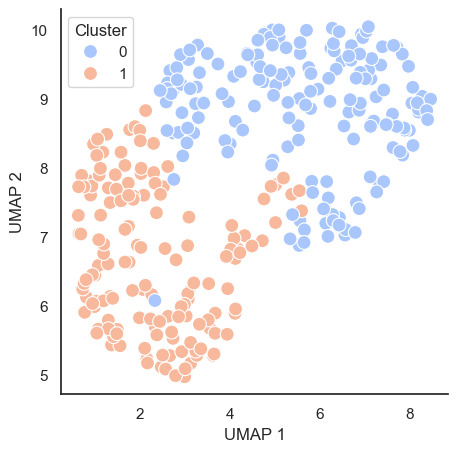

In [73]:
cm_to_inch = 1 / 2.54

g = sns.scatterplot(
    data=design_matrix_train,
    x="UMAP 1",
    y="UMAP 2",
    hue="Cluster",
    palette="coolwarm",
    s=100
)

sns.despine()
g.figure.set_size_inches((5, 5))

In [74]:
final_protein_importances.to_csv(
    "highrisk_sepsis_importances.tsv",
    sep="\t",
    index=False
)

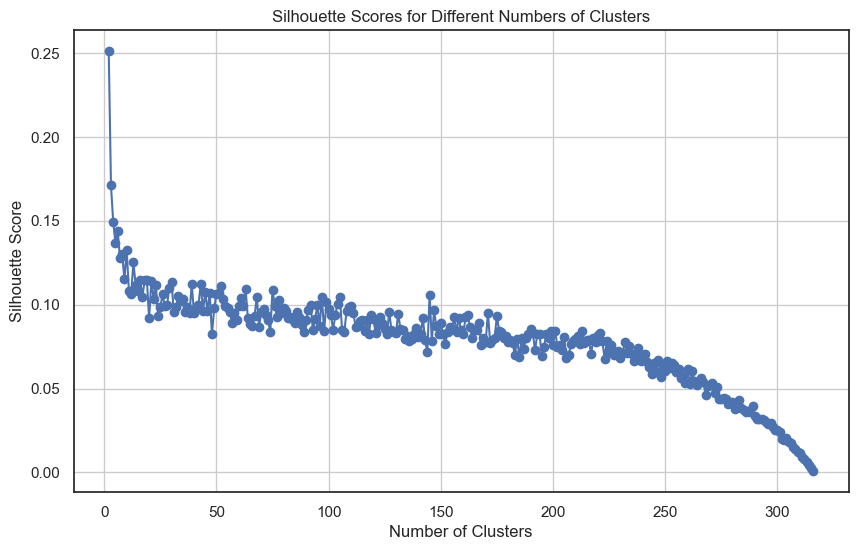

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming X is your preprocessed data
# X = ...

silhouette_scores = []
cluster_range = range(2, X.shape[0])

for n_clusters in cluster_range:
    model = KMeans(n_clusters=n_clusters)
    cluster_labels = model.fit_predict(X[selected_features])
    silhouette_avg = silhouette_score(X[selected_features], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    #print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}')

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

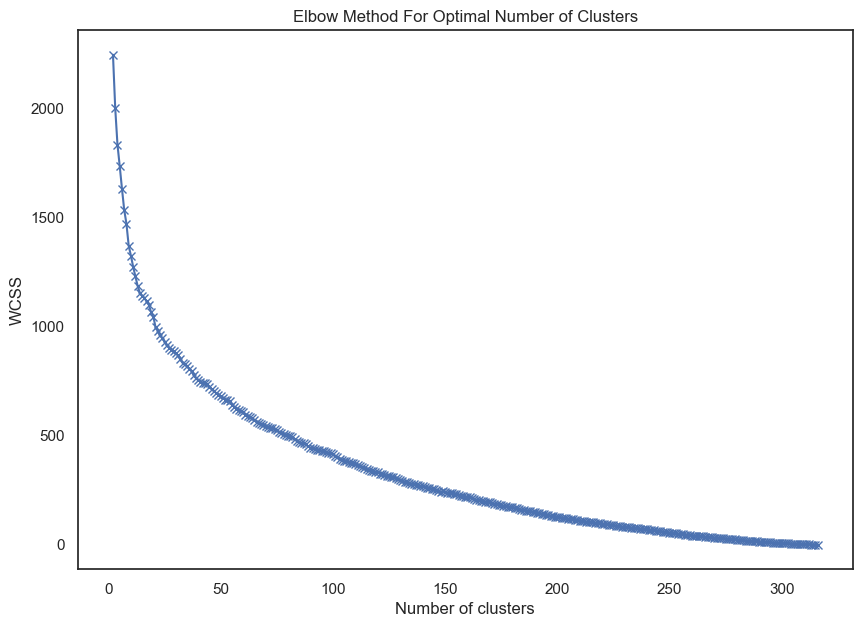

In [76]:
K = range(2, 
          X.shape[0]
          )

wcss = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X[selected_features])
    cluster_labels = kmeans.fit_predict(X[selected_features])
    silhouette_avg = silhouette_score(X[selected_features], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 7))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.savefig("elbow.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [77]:
from kneed import KneeLocator

kneedle = KneeLocator(K, wcss, curve="convex", direction="decreasing")

In [78]:
print(round(kneedle.knee, 3))

print(round(kneedle.elbow, 3))

42
42


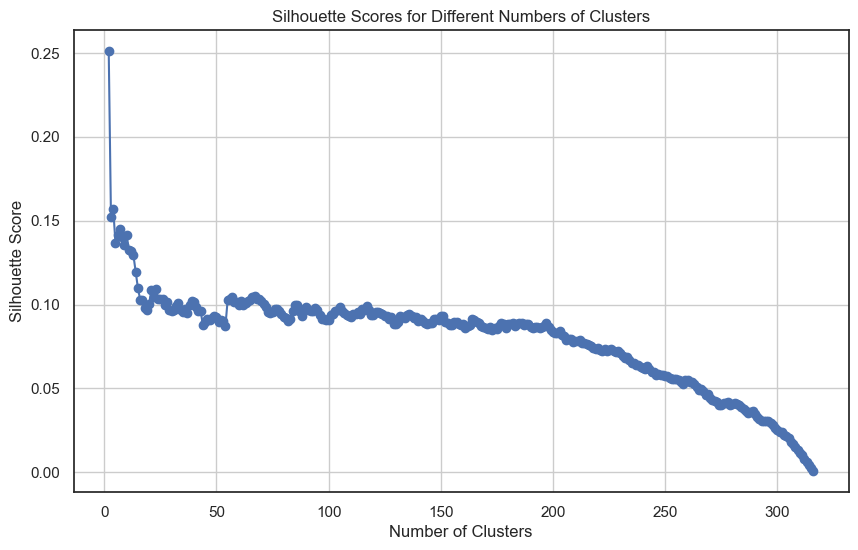

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig("sillhoute_scores.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [80]:
data = np.array(silhouette_scores[42:200])

mean_silhoutte_score = np.mean(data)

mad = np.mean(np.abs(data - mean_silhoutte_score))
mad

0.004095735872063853

In [81]:
coagulation_genes = enr.res2d[enr.res2d['Term'] == "Negative Regulation Of Blood Coagulation (GO:0030195)"]['Genes'].str.split(";").values[0]
coagulation_genes

['FGB',
 'FGA',
 'CPB2',
 'F12',
 'F11',
 'FGG',
 'PLG',
 'F2',
 'KNG1',
 'VTN',
 'PROC',
 'APOH',
 'KLKB1']

In [82]:
hdl_genes = enr.res2d[enr.res2d['Term'] == "High-Density Lipoprotein Particle Remodeling (GO:0034375)"]['Genes'].str.split(";").values[0]
hdl_genes

['CETP', 'APOM', 'APOC1', 'APOA2', 'APOC3', 'LCAT', 'APOA4', 'PLTP']

In [83]:
quant_matrix_de

,Protein,ProteinLabel,Gene,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,...,SA_BOX_3-2583_S4-A11_1_5596,SA_BOX_15-663_S4-C1_1_6694,SA_BOX_1-259_S1-G5_1_6827,SA_BOX_14-1566_S2-H4_1_6625,SA_BOX_8-1160_S5-E3_1_6025,SA_BOX_12-1949_S5-C4_1_6424,SA_BOX_10-1165_S2-B6_1_6243,SA_BOX_6-659_S2-F10_1_5887,SA_BOX_2-764_S2-G2_1_6901,Color
0,P02671,FIBA_HUMAN,FGA,0.740222,19.454514,19.197454,0.233879,0.302691,0.257060,7.908275e-16,...,19.404870,19.219480,19.434650,19.600700,19.945478,19.228436,19.440404,19.413945,19.446866,1
1,P02787,TRFE_HUMAN,TF,0.309263,19.509117,19.663906,0.261545,0.274537,-0.154789,6.746908e-07,...,20.246120,19.093970,19.402185,19.341731,18.815082,19.635437,19.738758,19.648279,19.465896,1
2,P08603,CFAH_HUMAN,CFH,0.072130,17.229129,17.307546,0.376049,0.365334,-0.078418,6.580171e-02,...,17.154898,17.087498,17.010549,16.689124,17.421490,17.058088,17.522319,17.597810,17.200768,0
3,P00450,CERU_HUMAN,CP,0.074858,17.424510,17.348829,0.325345,0.361398,0.075681,5.293048e-02,...,17.509469,17.101894,17.113322,16.792584,17.170518,17.848949,17.771656,17.484797,17.819514,0
4,P06396,GELS_HUMAN,GSN,0.256522,14.905553,15.126166,0.445851,0.450659,-0.220613,2.187124e-05,...,16.000440,14.084810,14.368574,14.117389,14.110880,14.517564,15.487246,15.026240,15.276030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,P23470,PTPRG_HUMAN,PTPRG,0.151812,8.766152,8.512531,1.286599,1.400411,0.253620,9.751890e-02,...,9.414379,9.817244,9.140261,9.233517,8.540298,8.800283,9.219896,8.147713,8.940368,0
283,P04066,FUCO_HUMAN,FUCA1,0.087168,7.634509,7.483074,1.908502,1.918180,0.151435,4.889681e-01,...,7.829085,7.683844,8.037318,7.042684,8.710018,9.250549,7.889671,3.901654,4.242916,0
284,P13473,LAMP2_HUMAN,LAMP2,0.151044,9.886461,10.139578,1.459680,1.214134,-0.253117,1.051640e-01,...,10.082267,3.397471,9.876204,10.132031,10.770226,10.770148,10.886836,10.803724,10.217573,0
285,Q7L2H7,EIF3M_HUMAN,EIF3M,0.222494,15.071886,15.323882,0.641046,0.538405,-0.251997,2.827218e-04,...,16.075193,13.366689,15.305685,14.133238,14.485120,14.229865,15.736272,15.519163,15.556819,1


In [84]:
proteins, labels = quant_matrix_train.to_ml(feature_column="Gene")

In [85]:
proteins[coagulation_genes]

,FGB,FGA,CPB2,F12,F11,FGG,PLG,F2,KNG1,VTN,PROC,APOH,KLKB1
SA_BOX_15-464_S4-G9_1_6763,19.802505,19.832547,13.041840,12.822084,11.972565,19.479392,16.777349,16.315175,16.971350,17.080660,10.893422,16.638315,13.743195
SA_BOX_7-1728_S4-F9_1_5977,19.518717,18.916951,13.401988,14.084881,12.701131,19.318721,17.198404,16.858771,17.906972,17.458097,11.705831,17.476599,14.503167
SA_BOX_13-332_S1-H3_1_6519,18.552759,18.652689,12.327323,12.906236,11.535787,18.550353,16.325520,16.108025,16.993216,16.883847,11.037997,15.885892,13.790570
SA_BOX_4-704_S5-D2_1_5624,19.569449,19.320538,13.023611,13.892968,11.803341,19.296441,16.801482,16.389177,17.514731,17.144104,11.579269,17.287636,14.030325
SA_BOX_12-2003_S5-H6_1_6445,19.114711,19.020035,13.129166,13.611163,12.094521,18.964521,16.809712,16.269824,17.333299,16.902996,11.921305,17.171050,14.161713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA_BOX_8-1160_S5-E3_1_6025,20.150456,19.945478,12.724740,12.726609,11.890688,19.559558,16.281388,16.487193,17.226751,17.391486,11.374187,16.342358,13.105876
SA_BOX_12-1949_S5-C4_1_6424,19.446618,19.228436,13.072136,13.165686,11.473064,19.117447,16.042956,16.288419,17.041715,15.796466,10.560596,16.244974,13.577037
SA_BOX_10-1165_S2-B6_1_6243,19.775626,19.440404,13.292798,13.543796,12.381729,19.386593,17.153431,16.947221,17.543998,17.259485,11.859956,16.862550,14.646551
SA_BOX_6-659_S2-F10_1_5887,19.677826,19.413945,13.002711,13.486181,12.369711,19.181323,16.960593,16.484990,17.627408,17.210969,11.576106,16.283875,13.572527


In [86]:
lut = dict(zip(labels['label'].unique(), "rb"))
row_colors = labels['label'].map(lut)

In [87]:
lut

{1: 'r', 0: 'b'}

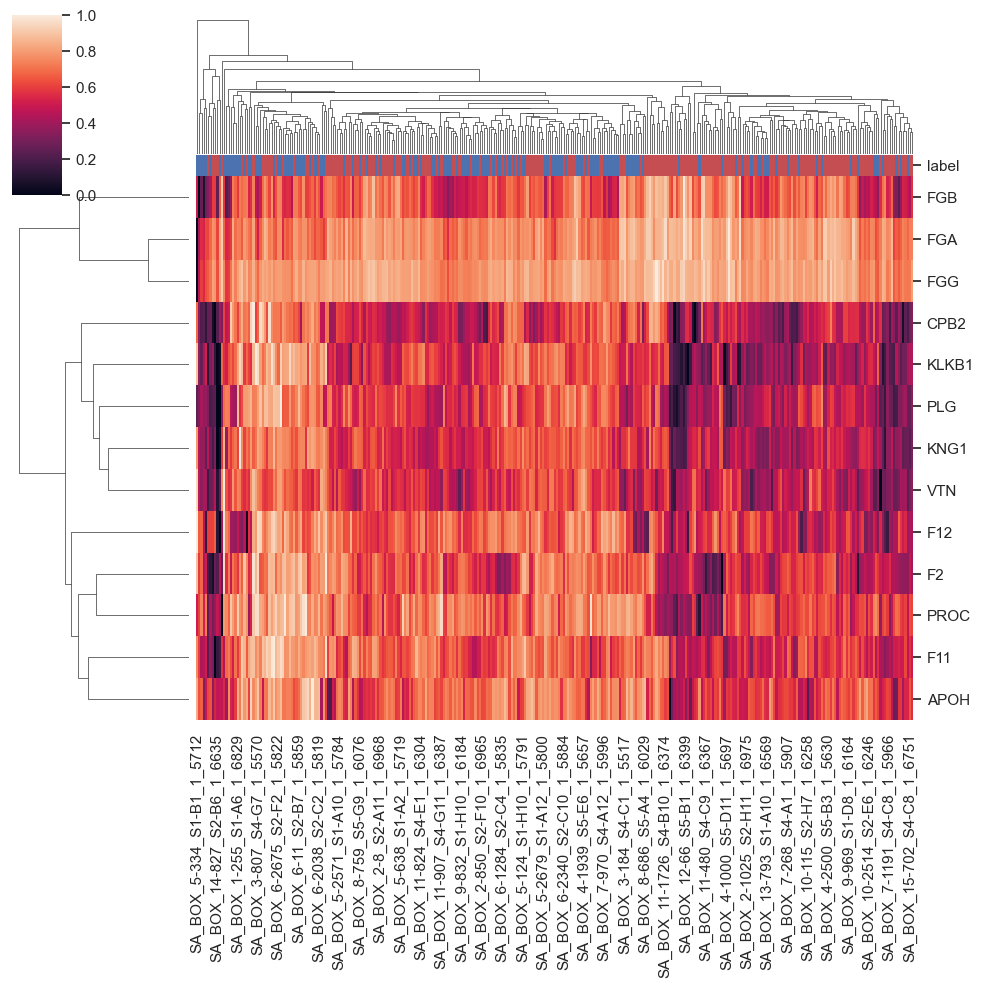

In [88]:
sns.clustermap(
    proteins[coagulation_genes].T, 
    col_colors=row_colors, 
    standard_scale=0, 
    #z_score=0
)

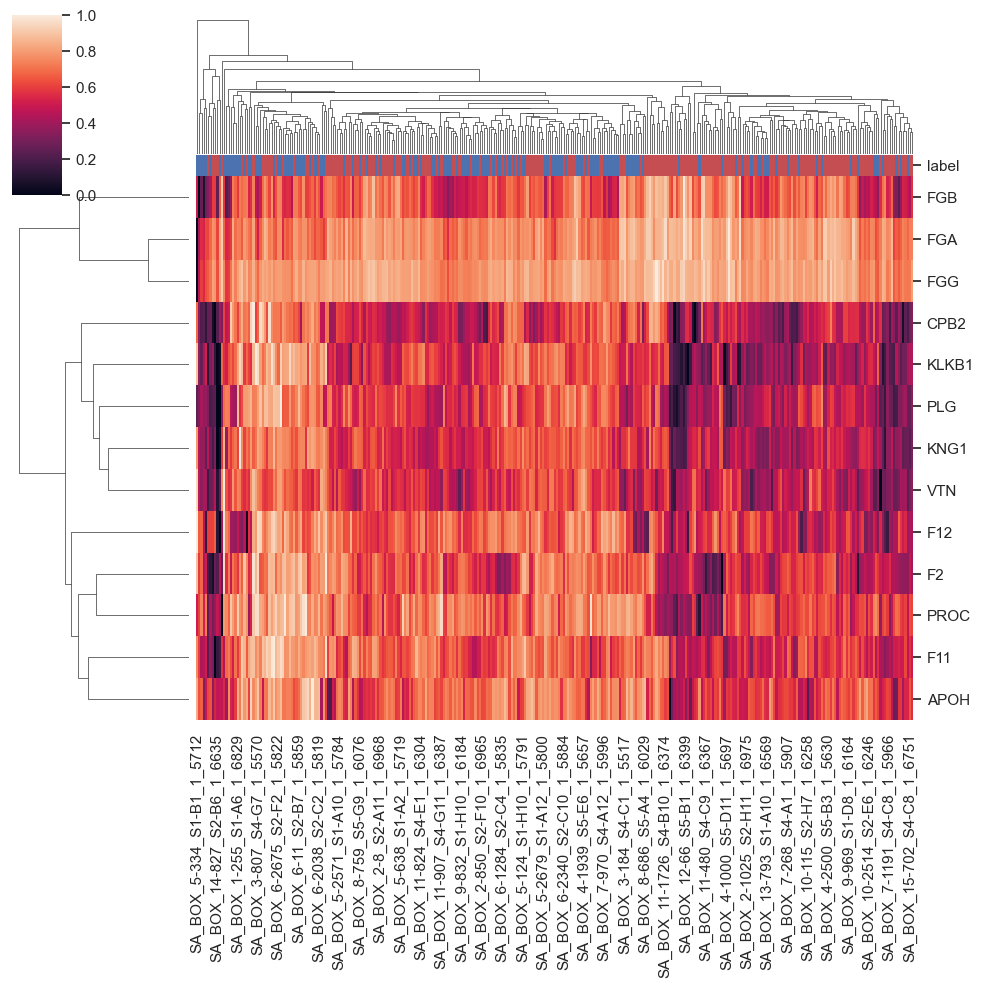

In [89]:
sns.clustermap(
    proteins[coagulation_genes].T, 
    col_colors=row_colors, 
    standard_scale=0, 
    #z_score=0
)

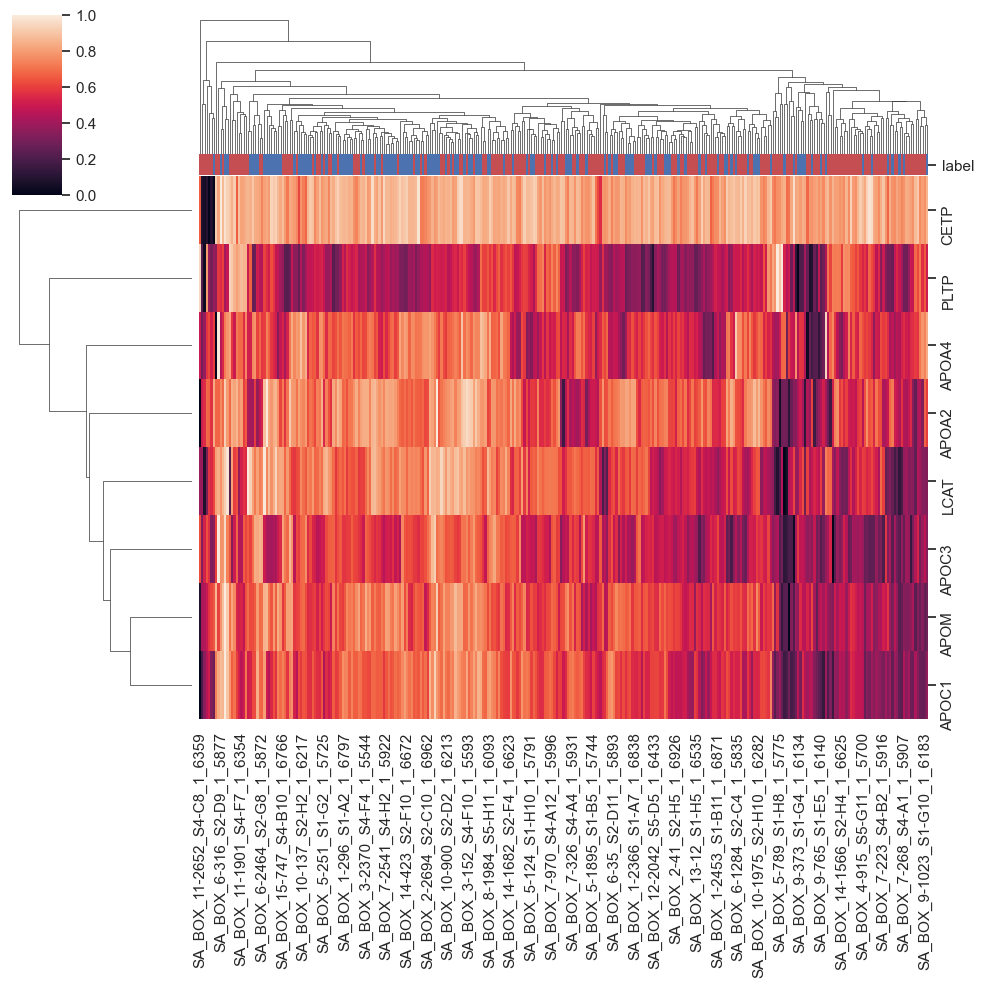

In [90]:
sns.clustermap(
    proteins[hdl_genes].T, 
    col_colors=row_colors, 
    standard_scale=0, 
    #z_score=0
)